In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.ticker import ScalarFormatter
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import gmean
from scipy.interpolate import Rbf
from scipy.interpolate import griddata

np.warnings.filterwarnings('ignore')
%matplotlib inline

# 1 Visualización de los Datos

In [21]:
Target_GQ = "C:/Users/UserPro/Py_GQ_Target/GQ_Soil_Target.xlsx"
DB_GQ = pd.read_excel(Target_GQ, sheet_name='Data_Assay_Edit')
DB_GQ.head()

,ID,SamCode,CoordX,CoordY,Altitude,SiO2_pct,Al2O3_pct,CaO_pct,MgO_pct,K2O_pct,...,Zr_ppm,Be_ppm,B_ppm,Sn_ppm,Ag_ppm,U_ppm,Th_ppm,La_ppm,Y_ppm,Au_ppb
0,1,001c1,489270.2,8333100.0,758.73,62.72,11.89,0.69,1.82,1.90,...,169.0,1.00,28.3,1.42,0.094,1.8,5.3,23.2,35.1,0.4
1,2,001d1,489589.3,8333113.0,794.51,57.31,12.73,1.27,1.81,2.02,...,158.0,0.79,22.1,6.46,0.077,1.6,5.4,25.8,27.3,0.5
2,3,003d1,487676.3,8332161.0,914.44,42.54,11.34,7.43,3.64,2.54,...,177.0,1.30,16.9,2.23,0.130,2.4,7.5,26.5,40.8,2.3
3,4,004b1,488788.3,8332855.0,761.48,66.66,11.11,0.57,1.16,1.25,...,159.0,0.81,20.5,1.31,0.076,1.6,4.5,20.2,28.7,0.5
4,5,004c1,488261.0,8332323.0,853.56,46.82,10.56,2.26,3.98,3.82,...,90.7,1.10,102.0,2.08,0.130,1.3,3.2,20.3,31.1,1.0


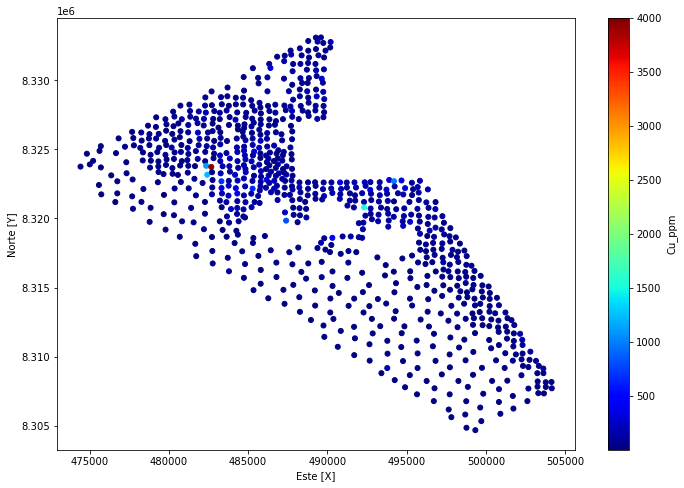

In [22]:
plt.subplot(111)
plt.scatter(DB_GQ["CoordX"], DB_GQ["CoordY"], c=DB_GQ["Cu_ppm"], s=25, marker="o", cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label("Cu_ppm", labelpad=+5)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1.5, wspace=0, hspace=0)
plt.show()

# 2 Selección de Variables

In [23]:
Vtargets = ["Au_ppb","Ag_ppm","Cu_ppm","Zn_ppm","Pb_ppm","Co_ppm"]
Vstats = DB_GQ[Vtargets]
Vstats.describe()

,Au_ppb,Ag_ppm,Cu_ppm,Zn_ppm,Pb_ppm,Co_ppm
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.916442,0.065277,79.925518,80.914357,25.748564,15.618102
std,3.672184,0.054277,178.092824,93.935906,22.975941,17.963319
min,0.130000,0.019000,0.740000,5.800000,2.400000,0.420000
25%,0.300000,0.037000,18.800000,36.100000,14.500000,7.000000
50%,0.600000,0.050000,49.100000,62.600000,20.500000,12.600000
75%,0.900000,0.071000,94.400000,104.000000,31.000000,19.100000
max,89.500000,0.580000,4000.000000,2040.000000,385.000000,222.000000


# 3 Análisis univariado del Cu

# 3.1 Estadística descriptiva del Cu

Min:  0.74
Max:  4000.0
Rango:  3999.26
Kurtosis:  303.62
Asimetría:  15.05
Media:  79.93
Media Geo:  43.31
Varianza:  31717.05
Dstd:  178.09
CV:  2.23
Cuartil 1:  18.8
Mediana:  49.1
Cuartil 3:  94.4


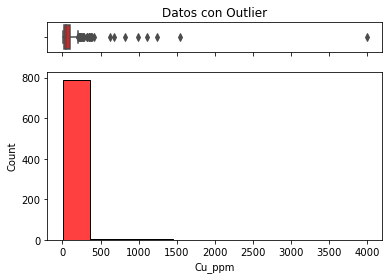

In [24]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(Vstats["Cu_ppm"], ax=ax_box, color="red")
sns.histplot(data=Vstats, x="Cu_ppm", ax=ax_hist, bins="sturges", color="red")
ax_box.set(title='Datos con Outlier')
ax_box.set(xlabel='')

print("Min: ", Vstats["Cu_ppm"].min())
print("Max: ", Vstats["Cu_ppm"].max())
print("Rango: ", Vstats["Cu_ppm"].max()-Vstats["Cu_ppm"].min())


print("Kurtosis: ", round(Vstats["Cu_ppm"].kurt(),2))
print("Asimetría: ", round(Vstats["Cu_ppm"].skew(),2))
print("Media: ", round(Vstats["Cu_ppm"].mean(),2))
print("Media Geo: ", round(gmean(Vstats["Cu_ppm"]),2))
print("Varianza: ", round(Vstats["Cu_ppm"].var(),2))
print("Dstd: ", round((Vstats["Cu_ppm"].var())**0.5,2))
print("CV: ", round(((Vstats["Cu_ppm"].var())**0.5)/Vstats["Cu_ppm"].mean(),2))

print("Cuartil 1: ", round(np.percentile(Vstats["Cu_ppm"],25),2))
print("Mediana: ", round(np.percentile(Vstats["Cu_ppm"],50),2))
print("Cuartil 3: ", round(np.percentile(Vstats["Cu_ppm"],75),2))


plt.show()

# 3.2 Calculando Outliers

In [25]:
3*(np.percentile(Vstats["Cu_ppm"],75)-np.percentile(Vstats["Cu_ppm"],25))

226.8

In [26]:
np.percentile(Vstats["Cu_ppm"],95)

194.0

In [27]:
np.percentile(Vstats["Cu_ppm"],98)

344.0

In [28]:
np.percentile(Vstats["Cu_ppm"],99)

410.0

# 3.3 Outlier Drop

In [29]:
Vstats["outlier_Cu"] = np.where(Vstats["Cu_ppm"]>344, "Atipico", "No-atipico")
DB_Cu_wo = Vstats[Vstats["outlier_Cu"]=="No-atipico"]
Vstats["Cu_ppm"][Vstats["outlier_Cu"]=="Atipico"].count()

16

Min:  0.74
Max:  344.0
Rango:  343.26
Kurtosis:  2.82
Asimetría:  1.53
Varianza:  3264.62
Media:  63.78
Media Geo:  40.99
Dstd:  57.14
CV:  0.9
Cuartil 1:  18.5
Mediana:  48.6
Cuartil 3:  89.7


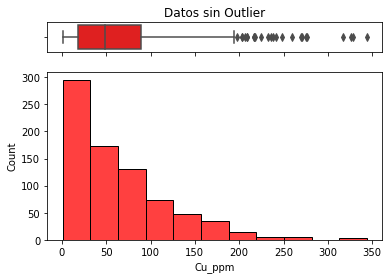

In [30]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(DB_Cu_wo["Cu_ppm"], ax=ax_box, color="red")
sns.histplot(data=DB_Cu_wo, x="Cu_ppm", ax=ax_hist, bins="sturges", color="red")
ax_box.set(title='Datos sin Outlier')
ax_box.set(xlabel='')

print("Min: ", DB_Cu_wo["Cu_ppm"].min())
print("Max: ", DB_Cu_wo["Cu_ppm"].max())
print("Rango: ", DB_Cu_wo["Cu_ppm"].max()-DB_Cu_wo["Cu_ppm"].min())

print("Kurtosis: ", round(DB_Cu_wo["Cu_ppm"].kurt(),2))
print("Asimetría: ", round(DB_Cu_wo["Cu_ppm"].skew(),2))
print("Varianza: ", round(DB_Cu_wo["Cu_ppm"].var(),2))
print("Media: ", round(DB_Cu_wo["Cu_ppm"].mean(),2))
print("Media Geo: ", round(gmean(DB_Cu_wo["Cu_ppm"]),2))
print("Dstd: ", round((DB_Cu_wo["Cu_ppm"].var())**0.5,2))
print("CV: ", round(((DB_Cu_wo["Cu_ppm"].var())**0.5)/DB_Cu_wo["Cu_ppm"].mean(),2))

print("Cuartil 1: ", round(np.percentile(DB_Cu_wo["Cu_ppm"],25),2))
print("Mediana: ", round(np.percentile(DB_Cu_wo["Cu_ppm"],50),2))
print("Cuartil 3: ", round(np.percentile(DB_Cu_wo["Cu_ppm"],75),2))

plt.show()

# 3.4 Transformación de la variable Log10 y LN

In [31]:
DB_Cu_wo["Log_Cu"]=np.log10(DB_Cu_wo["Cu_ppm"])
DB_Cu_wo["LN_Cu"]=np.log(DB_Cu_wo["Cu_ppm"])
DB_Cu_wo.describe()

,Au_ppb,Ag_ppm,Cu_ppm,Zn_ppm,Pb_ppm,Co_ppm,Log_Cu,LN_Cu
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.776777,0.064257,63.776229,76.893631,24.896943,14.132229,1.612661,3.713290
std,1.879519,0.050610,57.136865,62.302794,18.083164,11.197534,0.445005,1.024662
min,0.130000,0.019000,0.740000,5.800000,2.400000,0.420000,-0.130768,-0.301105
25%,0.300000,0.037000,18.500000,35.600000,14.500000,6.800000,1.267172,2.917771
50%,0.500000,0.050000,48.600000,61.800000,20.400000,12.500000,1.686636,3.883624
75%,0.900000,0.071000,89.700000,102.000000,30.800000,18.800000,1.952792,4.496471
max,47.400000,0.530000,344.000000,545.000000,181.000000,115.000000,2.536558,5.840642


Kurtosis:  -0.49
Asimetría:  -0.4
Varianza:  1.05
Media:  3.71
Dstd:  1.02


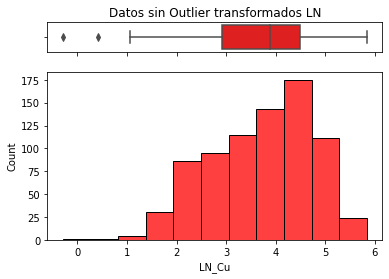

In [32]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(DB_Cu_wo["LN_Cu"], ax=ax_box, color="red")
sns.histplot(data=DB_Cu_wo, x="LN_Cu", ax=ax_hist, bins="sturges", color="red")
ax_box.set(title='Datos sin Outlier transformados LN')
ax_box.set(xlabel='')

print("Kurtosis: ", round(DB_Cu_wo["LN_Cu"].kurt(),2))
print("Asimetría: ", round(DB_Cu_wo["LN_Cu"].skew(),2))
print("Varianza: ", round(DB_Cu_wo["LN_Cu"].var(),2))
print("Media: ", round(DB_Cu_wo["LN_Cu"].mean(),2))
print("Dstd: ", round((DB_Cu_wo["LN_Cu"].var())**0.5,2))
plt.show()

Kurtosis:  -0.49
Asimetría:  -0.4
Varianza:  0.2
Media:  1.61
Dstd:  0.45


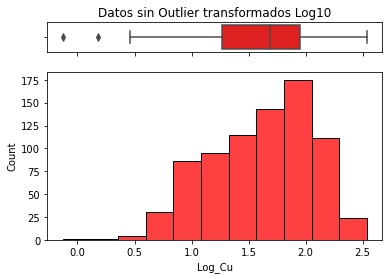

In [33]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(DB_Cu_wo["Log_Cu"], ax=ax_box, color="red")
sns.histplot(data=DB_Cu_wo, x="Log_Cu", ax=ax_hist, bins="sturges", color="red")
ax_box.set(title='Datos sin Outlier transformados Log10')
ax_box.set(xlabel='')

print("Kurtosis: ", round(DB_Cu_wo["Log_Cu"].kurt(),2))
print("Asimetría: ", round(DB_Cu_wo["Log_Cu"].skew(),2))
print("Varianza: ", round(DB_Cu_wo["Log_Cu"].var(),2))
print("Media: ", round(DB_Cu_wo["Log_Cu"].mean(),2))
print("Dstd: ", round((DB_Cu_wo["Log_Cu"].var())**0.5,2))
plt.show()

# 3.5 Cálculo de anomalías Cu_ppm

In [34]:
print("mean-2dst:",round(DB_Cu_wo["Log_Cu"].mean()-2*(DB_Cu_wo["Log_Cu"].var())**0.5,2))
print("mean-1dst:",round(DB_Cu_wo["Log_Cu"].mean()-(DB_Cu_wo["Log_Cu"].var())**0.5,2))
print("mean:",round(DB_Cu_wo["Log_Cu"].mean(),2))
print("mean+1dst:",round(DB_Cu_wo["Log_Cu"].mean()+(DB_Cu_wo["Log_Cu"].var())**0.5,2))
print("mean+2dst:",round(DB_Cu_wo["Log_Cu"].mean()+2*(DB_Cu_wo["Log_Cu"].var())**0.5,2))
print("mean+3dst:",round(DB_Cu_wo["Log_Cu"].mean()+3*(DB_Cu_wo["Log_Cu"].var())**0.5,2))

mean-2dst: 0.72
mean-1dst: 1.17
mean: 1.61
mean+1dst: 2.06
mean+2dst: 2.5
mean+3dst: 2.95


In [35]:
print("mean-2dst_ppm:",round(10**(DB_Cu_wo["Log_Cu"].mean()-2*(DB_Cu_wo["Log_Cu"].var())**0.5),2))
print("mean-1dst_ppm:",round(10**(DB_Cu_wo["Log_Cu"].mean()-1*(DB_Cu_wo["Log_Cu"].var())**0.5),2))
print("background:",round(10**(DB_Cu_wo["Log_Cu"].mean()),2))
print("Anomalía baja:",round(10**(DB_Cu_wo["Log_Cu"].mean()+1*(DB_Cu_wo["Log_Cu"].var())**0.5),2))
print("Anomalía media:",round(10**(DB_Cu_wo["Log_Cu"].mean()+2*(DB_Cu_wo["Log_Cu"].var())**0.5),2))
print("Anomalía alta:",round(10**(DB_Cu_wo["Log_Cu"].mean()+3*(DB_Cu_wo["Log_Cu"].var())**0.5),2))

mean-2dst_ppm: 5.28
mean-1dst_ppm: 14.71
background: 40.99
Anomalía baja: 114.2
Anomalía media: 318.18
Anomalía alta: 886.5


# 3.6 Visualización de Anomalías

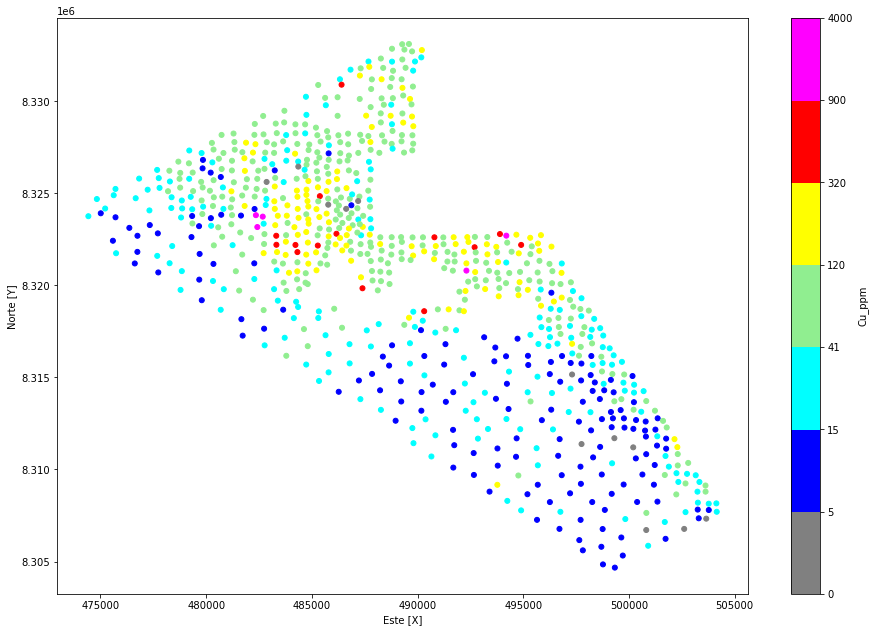

In [36]:
cmap = colors.ListedColormap(['gray', 'blue','cyan', 'lightgreen', 'yellow', 'red','fuchsia'])
boundaries = [0.0, 5, 15, 41, 120, 320, 900, 4000]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.subplot(111)
plt.scatter(DB_GQ["CoordX"], DB_GQ["CoordY"], c=DB_GQ["Cu_ppm"], s=25, marker="o", cmap=cmap, norm=norm)
cbar = plt.colorbar()
cbar.set_label("Cu_ppm", labelpad=+5)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0, hspace=0)
plt.show()

# Grilla de interpolación

In [18]:
grid_x = np.linspace(474400, 504400, 201)
grid_y = np.linspace(8304400, 8333400, 201)
xg, yg = np.meshgrid(grid_x, grid_y)

In [44]:
grid1 = griddata((x, y), u, (xg, yg), method='linear')
grid2 = griddata((x, y), u, (xg, yg), method='cubic')

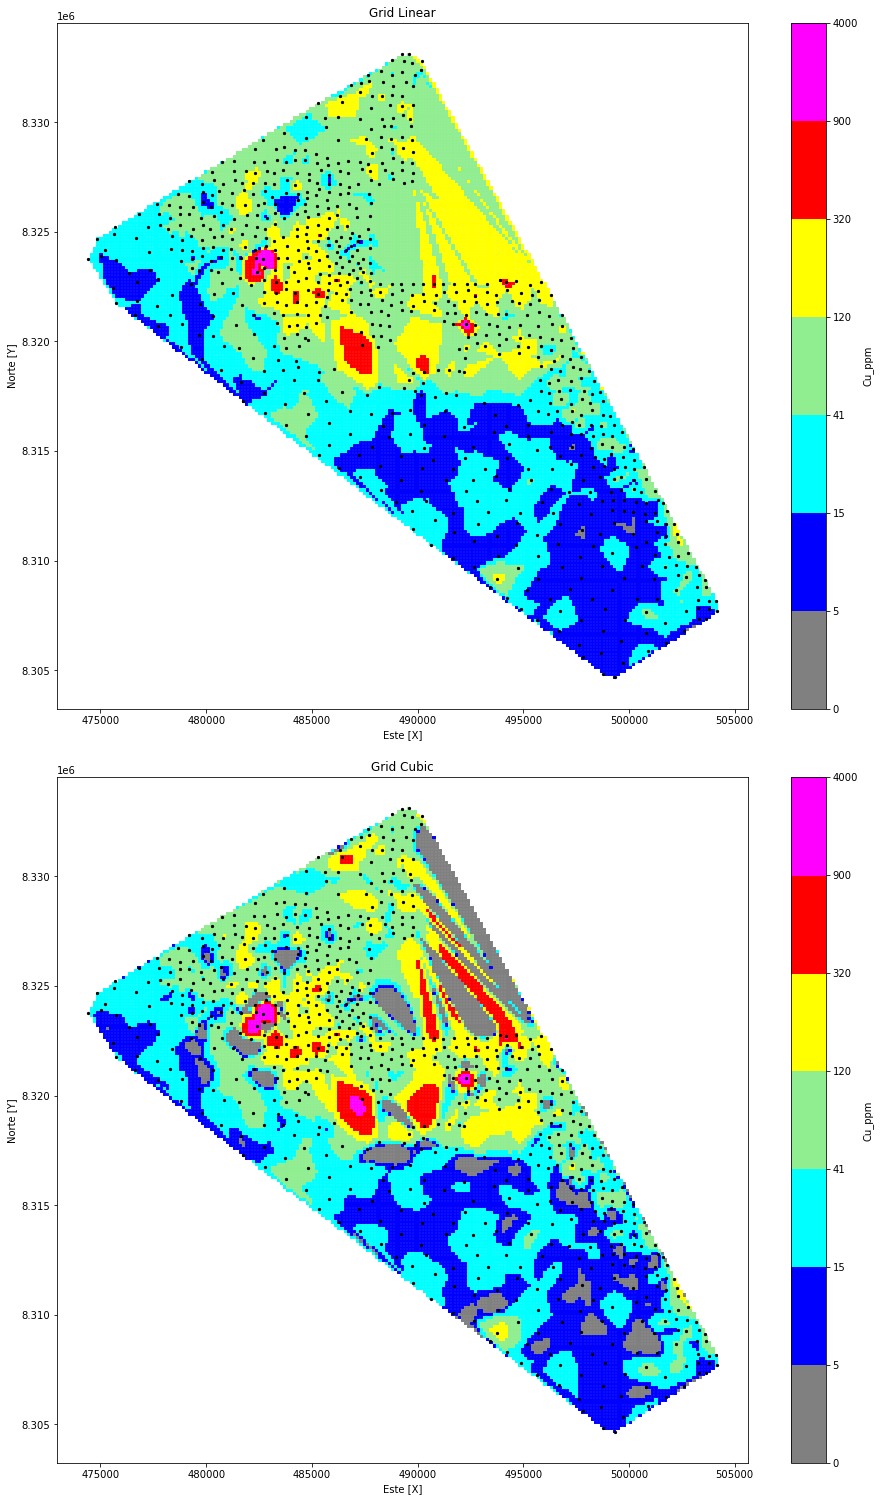

In [46]:
plt.subplot(211)
plt.scatter(xg, yg, marker="s", s=5, c=grid1, cmap=cmap, norm=norm)
cbar = plt.colorbar()
cbar.set_label("Cu_ppm")
plt.scatter(x,y,c='black', s=5, marker="o")
plt.title("Grid Linear")
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=1, bottom=1, right=3, top=6, wspace=0.1, hspace=0.1)

plt.subplot(212)
plt.scatter(xg, yg, marker="s", s=5, c=grid2, cmap=cmap, norm=norm)
cbar = plt.colorbar()
cbar.set_label("Cu_ppm")
plt.scatter(x,y,c='black', s=5, marker="o")
plt.title("Grid Cubic")
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=1, bottom=1, right=3, top=6, wspace=0.1, hspace=0.1)

plt.show()